In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## 분석 시간 폴더 경로 & 목록에 접근

In [2]:
folder_path = '../res/'

folder_list = os.listdir(folder_path)

<span style="color: #FF0000; font-weight: bold; font-size: 24px;">분석 시간에 해당하는 정보를 입력하세요 ‼</span>

In [3]:
time_info = '20230605_034540' # '' 사이에 올바른 형식으로 입력하세요

In [4]:
file_name = f'analysis_result_{time_info}.csv'
file_path = os.path.join(folder_path, time_info, file_name)

# CSV 파일 불러오기
data = pd.read_csv(file_path)

data.head()

,Lot,Wafer,Mask,TestSite,Name,Date,Script ID,Script Version,Script Owner,Operator,...,ErrorFlag,Error description,Analysis Wavelength,Rsq of Ref. spectrum (Nth),Max transmission of Ref. spec. (dB),Rsq of IV,I at -1V [A],I at 1V [A],n_eff_0V,VpiL
0,HY202103,D07,LION1,DCM_LMZC,MZMCTE_LULAB_450_500,20190715_191703,process LMZC,0.1,D_노정완,ykim,...,0,No Error,1550,0.998434,-7.851665,1.0,2.603237e-08,0.006702,4.187352,1.634488
1,HY202103,D07,LION1,DCM_LMZC,MZMCTE_LULAB_450_500,20190715_192309,process LMZC,0.1,D_노정완,ykim,...,0,No Error,1550,0.997227,-9.054541,1.0,4.890819e-08,0.006328,4.210818,1.573239
2,HY202103,D07,LION1,DCM_LMZC,MZMCTE_LULAB_450_500,20190715_202341,process LMZC,0.1,D_노정완,ykim,...,0,No Error,1550,0.997172,-9.487260,1.0,4.591942e-08,0.006376,4.208677,1.477442
3,HY202103,D07,LION1,DCM_LMZC,MZMCTE_LULAB_450_500,20190715_195307,process LMZC,0.1,D_노정완,ykim,...,0,No Error,1550,0.996162,-8.343672,1.0,5.465495e-08,0.006316,4.181636,1.610908
4,HY202103,D07,LION1,DCM_LMZC,MZMCTE_LULAB_450_500,20190715_194108,process LMZC,0.1,D_노정완,ykim,...,0,No Error,1550,0.998104,-8.911875,1.0,4.814727e-08,0.006533,4.209112,1.508865


## Data cnts

* Counting the nums of data by wafer

Text(0.5, 1.0, 'Data cnts')

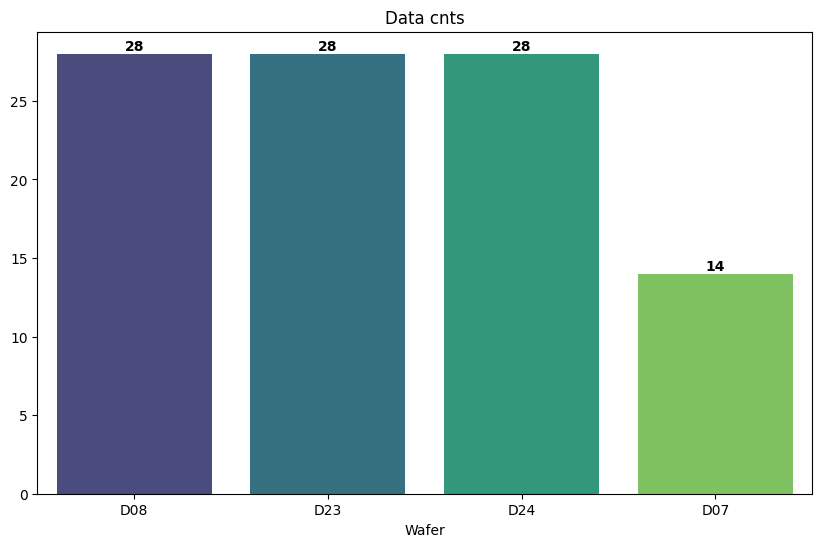

In [5]:
wafer_counts = data['Wafer'].value_counts()

plt.figure(figsize=(10, 6))

sns.barplot(x=wafer_counts.index, y=wafer_counts.values, palette='viridis')
for i, v in enumerate(wafer_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')
    
plt.title('Data cnts')

## ErrorFlag swarm & cnts

* This code allows for a clear comparison of error flag counts among different wafers

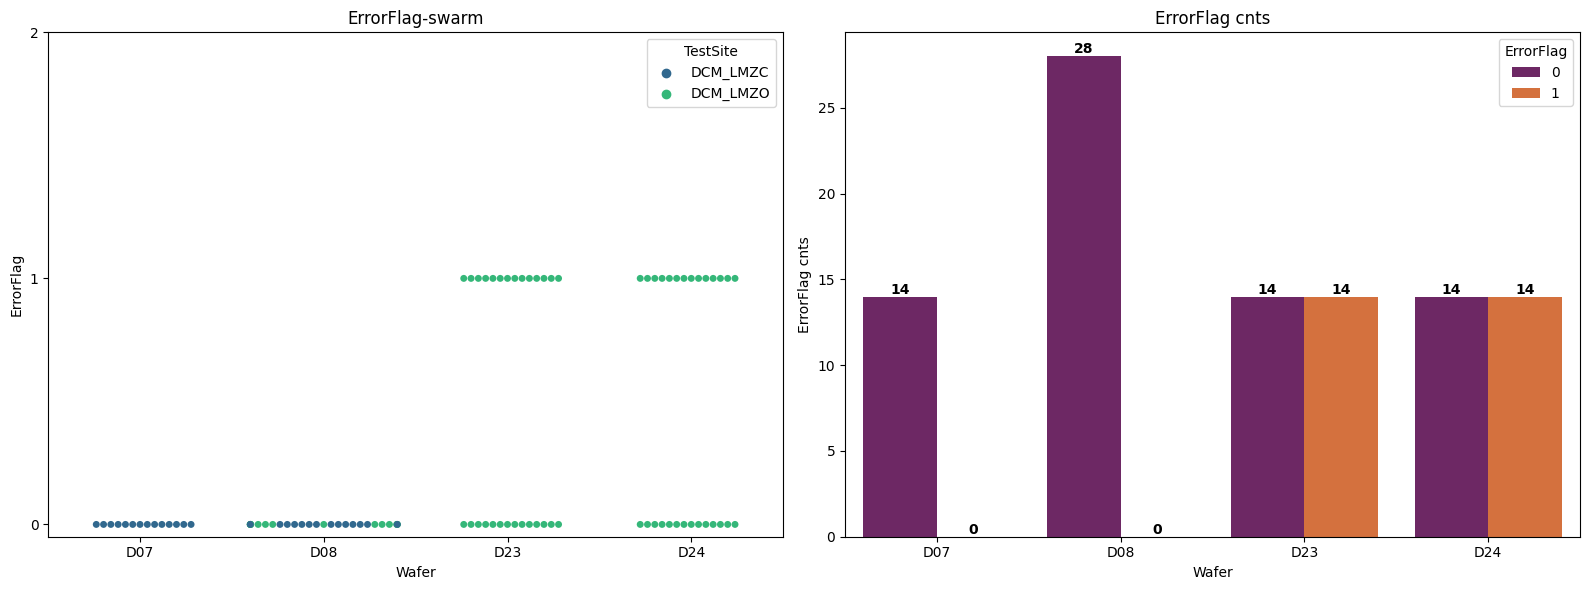

In [6]:
plt.figure(figsize=(16, 6))

# 왼쪽 subplot에 swarmplot
plt.subplot(1, 2, 1)
sns.swarmplot(x='Wafer', y='ErrorFlag', data=data, hue='TestSite',
              hue_order=['DCM_LMZC', 'DCM_LMZO'], palette='viridis')

plt.yticks([0, 1, 2])

plt.title('ErrorFlag-swarm')

# 오른쪽 subplot에 countplot
plt.subplot(1, 2, 2)
sns.countplot(x='Wafer', hue='ErrorFlag', data=data, palette='inferno')
plt.xlabel('Wafer')
plt.ylabel('ErrorFlag cnts')
plt.title('ErrorFlag cnts')
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontweight='bold')

plt.tight_layout()

## ErrorFlag with csv

* Show the data occurred error

In [7]:
data[data['ErrorFlag'] == 1]

,Lot,Wafer,Mask,TestSite,Name,Date,Script ID,Script Version,Script Owner,Operator,...,ErrorFlag,Error description,Analysis Wavelength,Rsq of Ref. spectrum (Nth),Max transmission of Ref. spec. (dB),Rsq of IV,I at -1V [A],I at 1V [A],n_eff_0V,VpiL
42,HY202103,D23,LION1,DCM_LMZO,MZMOTE_LULAB_380_500,20190531_081952,process LMZO,0.1,D_노정완,magdzi83,...,1,IV. spec. Error,1310,0.998081,-5.772735,0.545378,1.208074e-10,1.342980e-10,4.207455,110.708497
43,HY202103,D23,LION1,DCM_LMZO,MZMOTE_LULAB_380_500,20190531_085346,process LMZO,0.1,D_노정완,magdzi83,...,1,IV. spec. Error,1310,0.999189,-5.659568,-0.529210,1.187963e-10,1.255417e-10,4.184762,124.044642
44,HY202103,D23,LION1,DCM_LMZO,MZMOTE_LULAB_380_500,20190531_143204,process LMZO,0.1,D_노정완,magdzi83,...,1,IV. spec. Error,1310,0.998900,-6.330031,0.567239,1.212264e-10,1.348007e-10,4.208233,85.513000
45,HY202103,D23,LION1,DCM_LMZO,MZMOTE_LULAB_380_500,20190531_114251,process LMZO,0.1,D_노정완,magdzi83,...,1,IV. spec. Error,1310,0.998819,-6.509644,-0.510565,1.176231e-10,1.280554e-10,4.216000,-88.435788
46,HY202103,D23,LION1,DCM_LMZO,MZMOTE_LULAB_380_500,20190531_103513,process LMZO,0.1,D_노정완,magdzi83,...,1,IV. spec. Error,1310,0.999362,-5.497162,-0.099960,1.207655e-10,1.306949e-10,4.202565,56.359357
47,HY202103,D23,LION1,DCM_LMZO,MZMOTE_LULAB_380_500,20190531_150551,process LMZO,0.1,D_노정완,magdzi83,...,1,IV. spec. Error,1310,0.999218,-6.509544,-0.055910,1.206398e-10,1.288096e-10,4.193683,137.436430
48,HY202103,D23,LION1,DCM_LMZO,MZMOTE_LULAB_380_500,20190531_110901,process LMZO,0.1,D_노정완,magdzi83,...,1,IV. spec. Error,1310,0.998629,-6.835582,-0.180662,1.177069e-10,1.276365e-10,4.189986,419.748193
49,HY202103,D23,LION1,DCM_LMZO,MZMOTE_LULAB_380_500,20190531_121641,process LMZO,0.1,D_노정완,magdzi83,...,1,IV. spec. Error,1310,0.999142,-6.360543,-0.291913,1.202628e-10,1.282230e-10,4.203419,-123.997377
50,HY202103,D23,LION1,DCM_LMZO,MZMOTE_LULAB_380_500,20190531_074558,process LMZO,0.1,D_노정완,magdzi83,...,1,IV. spec. Error,1310,0.997737,-6.029227,-0.146964,1.195505e-10,1.270080e-10,4.207508,-88.830552
51,HY202103,D23,LION1,DCM_LMZO,MZMOTE_LULAB_380_500,20190531_100126,process LMZO,0.1,D_노정완,magdzi83,...,1,IV. spec. Error,1310,0.998756,-5.467068,0.540429,1.202209e-10,1.329992e-10,4.204767,64.732724


## ErrorFlag by operator

* Compare ErrorFlag by operator

* This code allows for a clear comparison of error flag by operator

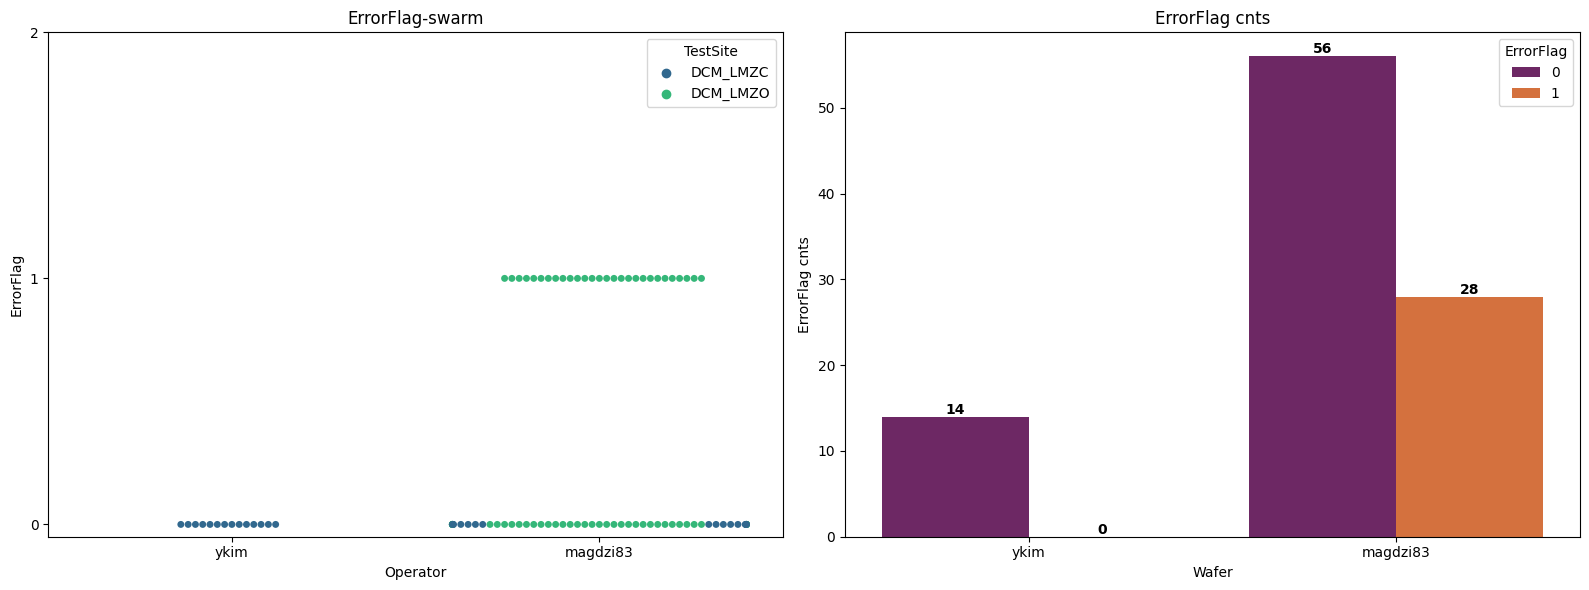

In [8]:
plt.figure(figsize=(16, 6))

# 왼쪽 subplot에 swarmplot
plt.subplot(1, 2, 1)
sns.swarmplot(x='Operator', y='ErrorFlag', data=data, hue='TestSite',
              hue_order=['DCM_LMZC', 'DCM_LMZO'], palette='viridis')

plt.yticks([0, 1, 2])

plt.title('ErrorFlag-swarm')

# 오른쪽 subplot에 countplot
plt.subplot(1, 2, 2)
sns.countplot(x='Operator', hue='ErrorFlag', data=data, palette='inferno')

plt.xlabel('Wafer')
plt.ylabel('ErrorFlag cnts')
plt.title('ErrorFlag cnts')

for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontweight='bold')

plt.tight_layout()

## I value at -1V & 1V

* Show current value at -1V, which means turn-off current

* Show current value at 1V, which means turn-on current

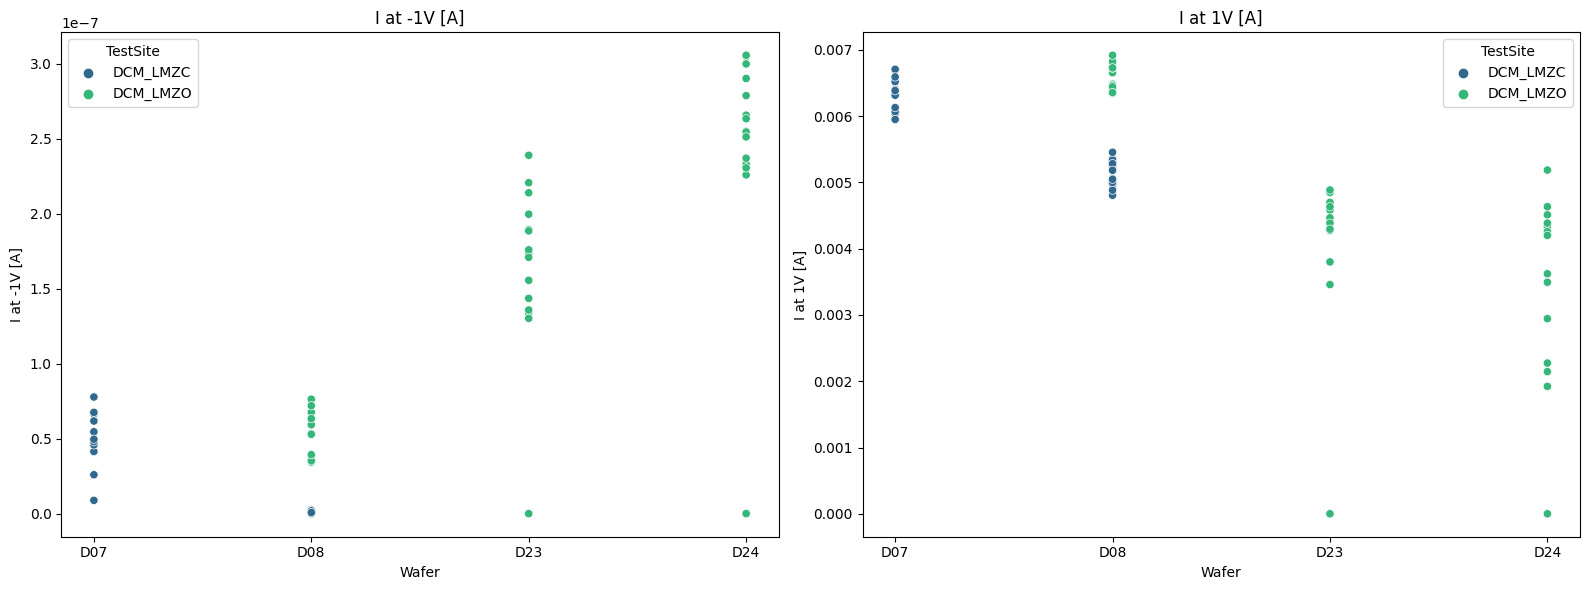

In [9]:
plt.figure(figsize=(16, 6))

# 왼쪽 subplot에 I at -1V [A]
plt.subplot(1, 2, 1)
sns.scatterplot(x='Wafer', y='I at -1V [A]', data=data, hue='TestSite',
                hue_order=['DCM_LMZC', 'DCM_LMZO'], palette='viridis')
plt.title('I at -1V [A]')

# 오른쪽 subplot에 I at 1V [A]
plt.subplot(1, 2, 2)
sns.scatterplot(x='Wafer', y='I at 1V [A]', data=data, hue='TestSite',
                hue_order=['DCM_LMZC', 'DCM_LMZO'], palette='viridis')
plt.title('I at 1V [A]')

plt.tight_layout()

## Max transmission of Ref. spec. (dB)

* The "Max transmission of Ref. spec." specifies the highest acceptable signal level in decibels,  
ensuring adherence to reference standards for signal strength.

Text(0.5, 1.0, 'Max transmission of Ref. spec. (dB)')

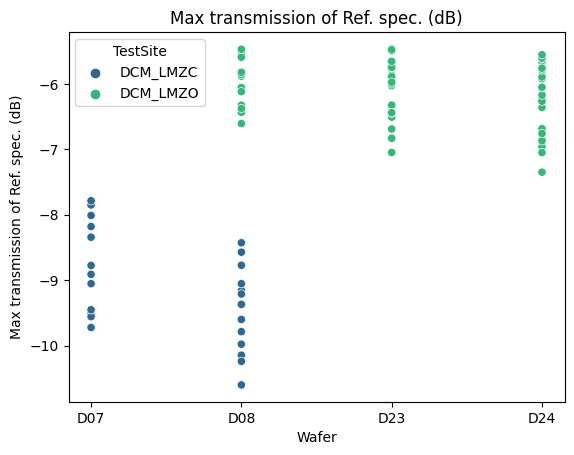

In [10]:
sns.scatterplot(x='Wafer', y='Max transmission of Ref. spec. (dB)', data=data, hue='TestSite',
                hue_order=['DCM_LMZC', 'DCM_LMZO'], palette='viridis')

plt.title('Max transmission of Ref. spec. (dB)')

## Rsqaure values of IV & Ref. spectrum

* Check the accuration for fitting of IV & Ref. spectrum

* This code allows for possible errors during fitting

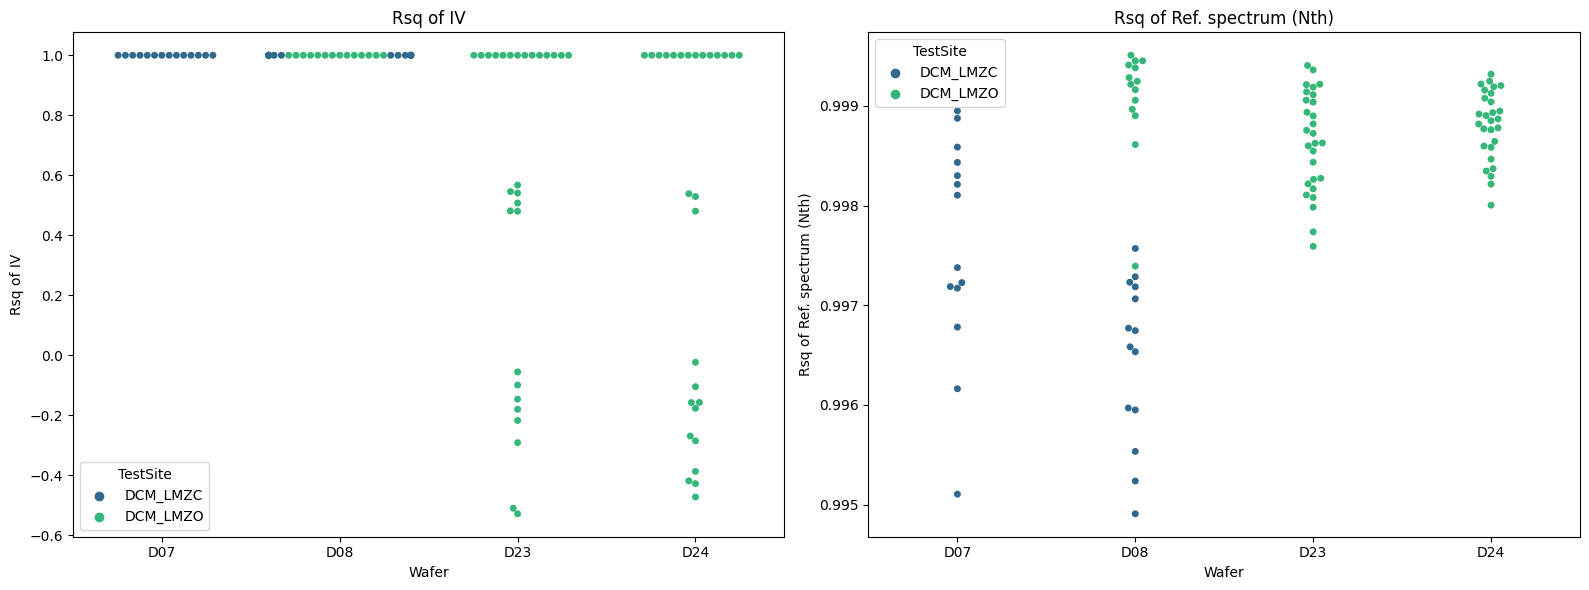

In [11]:
plt.figure(figsize=(16, 6))

# 왼쪽 subplot에 Rsq of IV 그래프
plt.subplot(1, 2, 1)
sns.swarmplot(x='Wafer', y='Rsq of IV', data=data,
              hue='TestSite', palette='viridis')
plt.title('Rsq of IV')

# 오른쪽 subplot에 Rsq of Ref. spectrum (Nth) 그래프
plt.subplot(1, 2, 2)
sns.swarmplot(x='Wafer', y='Rsq of Ref. spectrum (Nth)', data=data,
              hue='TestSite', hue_order=['DCM_LMZC', 'DCM_LMZO'],
              palette='viridis', dodge=False)
plt.title('Rsq of Ref. spectrum (Nth)')

plt.tight_layout()

## n_eff_0V & VpiL

* Show n_eff_0V value

* Show VpiL value to check the performance of optical devices

Text(0.5, 1.0, 'VpiL')

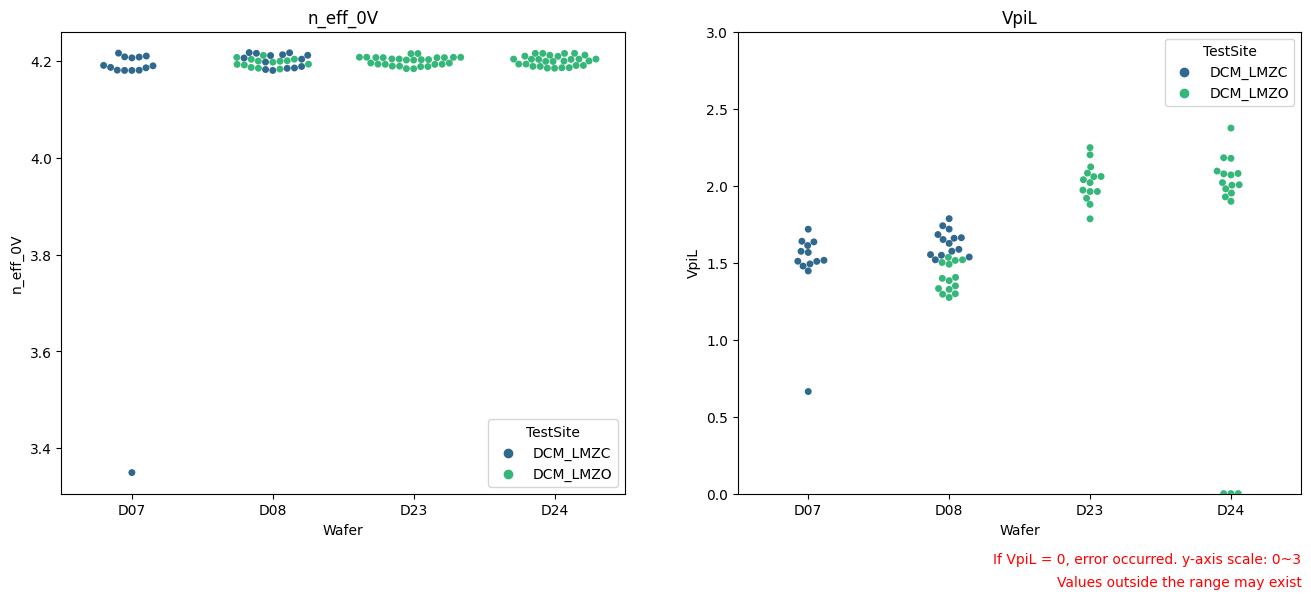

In [12]:
plt.figure(figsize=(16, 6))

# 왼쪽 subplot에 Rsq of IV 그래프
plt.subplot(1, 2, 1)
sns.swarmplot(x='Wafer', y='n_eff_0V', data=data, hue='TestSite',
              hue_order=['DCM_LMZC', 'DCM_LMZO'], palette='viridis')

plt.title('n_eff_0V')

plt.subplot(1, 2, 2)
sns.swarmplot(x='Wafer', y='VpiL', data=data, hue='TestSite',
              hue_order=['DCM_LMZC', 'DCM_LMZO'], palette='viridis')
plt.ylim(0, 3)
plt.text(1, -0.15, 'If VpiL = 0, error occurred. y-axis scale: 0~3', transform=plt.gca().transAxes, color='red', ha='right')
plt.text(1, -0.2, 'Values outside the range may exist', transform=plt.gca().transAxes,
         color='red', ha='right')
plt.title('VpiL')

## ErrorFlag by date

* Check for errors according to the analysis date

Text(0.5, 1.0, 'ErrorFlag by Date (Grouped by Wafer)')

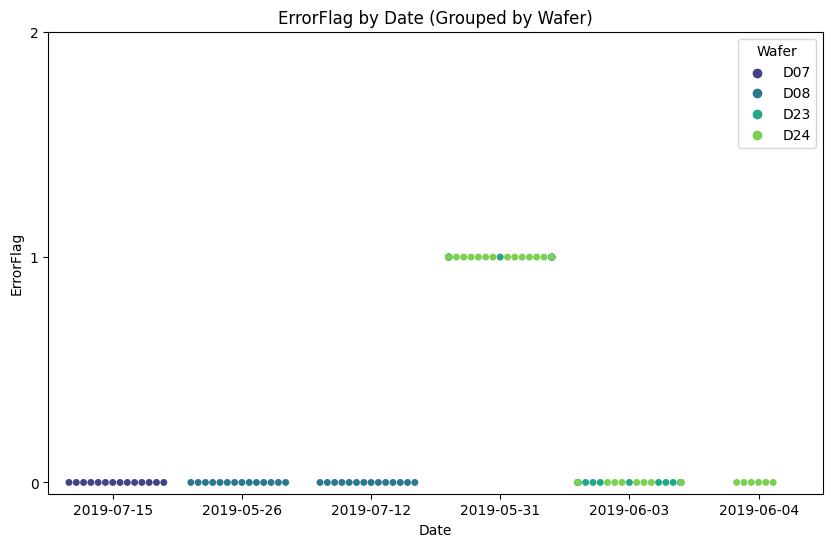

In [13]:
# 'Date' 열을 datetime 형식으로 변환
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d_%H%M%S')

# 'Date' 열에서 날짜 정보만 추출하여 새로운 'Date' 열 생성
data['Date'] = data['Date'].dt.date

plt.figure(figsize=(10, 6))

sns.swarmplot(x='Date', y='ErrorFlag', hue='Wafer', data=data,
              palette='viridis')

plt.yticks([0, 1, 2])

plt.title('ErrorFlag by Date (Grouped by Wafer)')